In [ ]:
from pymisca.util import *
from pymisca.vis_util import *
import IPython.display as ipd

import KBs
import random

DIR = 'data_pdist_rev'
!mkdir -p {DIR}

# %%time
import os
import workers
import time
worker = worker0323
ts = []
t0 = time.time()
oit = list(range(0,300))
for seed in oit:
    bsize= 600
    
    kb = KBs.kb_r2dntca()
    it = kb.bulk_rstr(seed=seed,bsize=bsize)
#     out = worker(it[0])
#     print out
#     break
    out = mp_map(worker,it,n_cpu=6)

    fname = os.path.join(DIR,'seed%d_size%d.npy'%(seed,bsize))
    np.save(fname,out)
    
    print "finished %d of %d"%(seed,(oit[-1]))
    t = time.time()
    ts.append(t-t0)
    t0 = t
#     break
print 'finished'
print 'avgtime:%.5fs'%(np.mean(ts))

is in ipython: 1
[WARN] pymisca.vis_util cannot find network
finished 0 of 299
finished 1 of 299
finished 2 of 299
finished 3 of 299
finished 4 of 299
finished 5 of 299
finished 6 of 299
finished 7 of 299
finished 8 of 299
finished 9 of 299
finished 10 of 299
finished 11 of 299
finished 12 of 299
finished 13 of 299
finished 14 of 299
finished 15 of 299
finished 16 of 299
finished 17 of 299
finished 18 of 299
finished 19 of 299
finished 20 of 299
finished 21 of 299
finished 22 of 299
finished 23 of 299
finished 24 of 299
finished 25 of 299
finished 26 of 299
finished 27 of 299
finished 28 of 299
finished 29 of 299
finished 30 of 299
finished 31 of 299
finished 32 of 299
finished 33 of 299
finished 34 of 299
finished 35 of 299
finished 36 of 299
finished 37 of 299
finished 38 of 299
finished 39 of 299
finished 40 of 299
finished 41 of 299
finished 42 of 299
finished 43 of 299
finished 44 of 299
finished 45 of 299
finished 46 of 299
finished 47 of 299
finished 48 of 299
finished 49 of 299

In [19]:
??kb.bulk_rstr

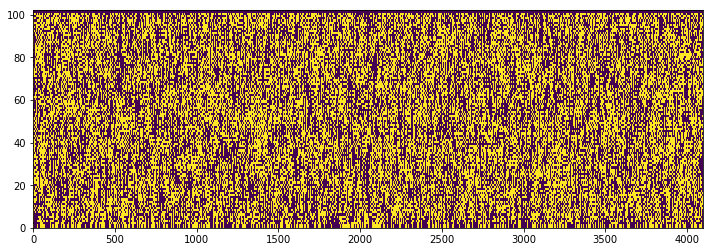

(2, 1, 64, 64)
(2, 2, 64, 64)


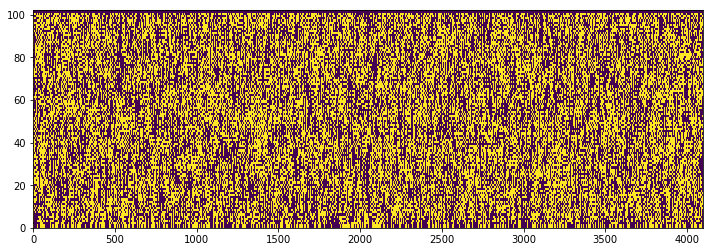

In [3]:
from KBs import *
import scipy.spatial.distance as spdist
def worker0323(dct,t=None):
    sysX = guess(dct=dct)
    hist = sample(sysX)
    if t is None:
        self = sysX
        t = {'r2dntca':2,}.get(self.family.familyname,1)
    hist = hist.reshape(hist.shape[:2]+(-1,))
    hist = np.concatenate([np.roll(hist,-t,axis=0) for t in range(t)],axis=-1)
#     print hist.shape
    d = spdist.pdist(hist[-t-2],'hamming')
    d = 1 - abs(2*d-1)
    D = spdist.squareform(d)
    np.fill_diagonal(D,2)
    
    d = spdist.pdist(hist[len(hist)//2],'hamming')
    d = 1 - abs(2*d-1)
    D1= spdist.squareform(d)
    np.fill_diagonal(D1,2)
    
    MIN = D.min(axis=0)
    MIN1 = D1.min(axis=0)
    data = np.vstack([MIN1,MIN]).T
    
    MEDS = [np.median(MIN1),np.median(MIN)]
    COV = np.cov(data.T)
    COR = cov2cor(COV)
    return {'rule':{'family':sysX.familyname,'rulestr':sysX.rulestr},
            'data':{ 'med':[x.tolist() for x in MEDS],'cov':COV.ravel().tolist(),'cor':[COR[0,1]]},
           }


import KBs
reload(KBs)
from KBs import *

# def sample(self,t=None,ini=None,adv = None,T = None):    
#     if t is None:
#         t = {'r2dntca':2,}.get(self.family.familyname,1)
#     if T is None:
#         T = self.hmax
#     if adv is None:
#         adv = self.adv
#     if ini is None:
#         if t>=2:
#             ini = np.array([self.rdf().astype(int)]*t)
#         else:
#             ini=self.rdf().astype(int)

#     avc = ini
#     hist = np.zeros((T+1+t,)+avc.shape[-3:],dtype=np.int)
#     hist[:t]=avc
#     for i in range(T+1):
#         hist[i+t]=avc[-1]
#         avc=(adv(avc)) 
#     return hist
class kb_r2dntca(kb_2dntca):
    familyname='r2dntca'
#     def __init__(self):
#         self.familyname = 'r2dntca'
#         self=super(kb_r2dntca,self).__init__()
#         return self
#        
    def bin2adv(self, ruleprj):
        if isinstance(ruleprj,str):
            ruleprj = list(ruleprj)
        ruleprj = np.array(ruleprj,np.int)
        def adv(a,horizon=0):
            old = a[0]
            curr = a[1]
            new  = ruleprj[self.conv(curr)]^old
            return np.array([curr,new])
                              
        return adv

kb = kb_r2dntca()
env = CA_sys(familyname='r2dntca')
env.alias2rulestr()
adv= kb.rulestr2adv(env.rulestr)
np.random.seed(0)
env.change_size((2,100,64**2))

p = .05
ini = np.array([env.rdf(p),env.rdf(p)])
ini = ini[:,0:1]

hist = sample(env)
showsptime(hist[:,0,:])
plt.show()
# ini = ini[::-1]
ini2 = hist[-2:][::-1]
print ini.shape
print ini2.shape
# hist = sample(env,adv=adv,ini=ini2,t=2)
showsptime(hist[:,0,:])
plt.show()


In [6]:
env.family

In [15]:
kb = kb_r2dntca()
print env.family
print env.family.familyname
print kb.familyname

kb_r2dntca
r2dntca


In [12]:
! echo "from tmp import *" >> KBs.py

In [25]:
code = '''" 
from KBs import *

def sample(self,t=None,ini=None,adv = None,T = None):    
    if t is None:
        t = {'r2dntca':2,}.get(self.family.familyname,1)
    if T is None:
        T = self.hmax
    if adv is None:
        adv = self.adv
    if ini is None:
        if t>=2:
            ini = np.array([self.rdf().astype(int)]*t)
        else:
            ini=self.rdf().astype(int)

    avc = ini
    hist = np.zeros((T+1+t,)+avc.shape[-3:],dtype=np.int)
    hist[:t]=avc
    for i in range(T+1):
        hist[i+t]=avc[-1]
        avc=(adv(avc)) 
    return hist
class kb_r2dntca(kb_2dntca):
    familyname='r2dntca'
#     def __init__(self):
#         self.familyname = 'r2dntca'
#         self=super(kb_r2dntca,self).__init__()
#         return self
#        
    def bin2adv(self, ruleprj):
        if isinstance(ruleprj,str):
            ruleprj = list(ruleprj)
        ruleprj = np.array(ruleprj,np.int)
        def adv(a,horizon=0):
            old = a[0]
            curr = a[1]
            new  = ruleprj[self.conv(curr)]^old
            return np.array([curr,new])
                              
        return adv

        "'''
! echo {code}> tmp.py
! cat tmp.py

 
from KBs import *

def sample(self,t=None,ini=None,adv = None,T = None):    
    if t is None:
        t = {'r2dntca':2,}.get(self.family.familyname,1)
    if T is None:
        T = self.hmax
    if adv is None:
        adv = self.adv
    if ini is None:
        if t>=2:
            ini = np.array([self.rdf().astype(int)]*t)
        else:
            ini=self.rdf().astype(int)

    avc = ini
    hist = np.zeros((T+1+t,)+avc.shape[-3:],dtype=np.int)
    hist[:t]=avc
    for i in range(T+1):
        hist[i+t]=avc[-1]
        avc=(adv(avc)) 
    return hist
class kb_r2dntca(kb_2dntca):
    familyname='r2dntca'
#     def __init__(self):
#         self.familyname = 'r2dntca'
#         self=super(kb_r2dntca,self).__init__()
#         return self
#        
    def bin2adv(self, ruleprj):
        if isinstance(ruleprj,str):
            ruleprj = list(ruleprj)
        ruleprj = np.array(ruleprj,np.int)
        def adv(a,horizon=0):
            old = a[0]
            curr = a[1]
            ne